#Module importieren & Datensatz einlesen

In [31]:
# Module importieren
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [32]:
data=pd.read_csv('SPAM text message 20170820 - Data.csv')

In [33]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#Datenimport und Exploration

In [34]:
data.groupby('Category').describe().T

Category                           ham  \
Message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

Category                                                     spam  
Message count                                                 747  
        unique                                                641  
        top     Please call our customer service representativ...  
        freq                                                    4

<Axes: xlabel='count', ylabel='Category'>

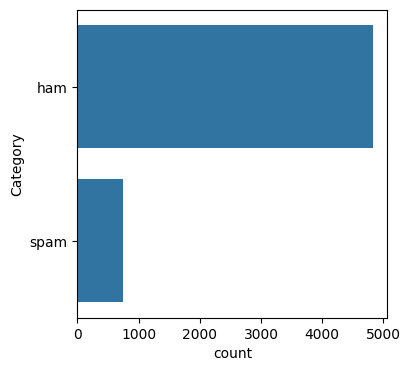

In [35]:
import seaborn as sns
plt.figure(figsize=(4,4))
sns.countplot(data['Category'])

In [36]:
#Daten ausbalancieren, da sie unausgewogen sind
ham_msg = data[data.Category =='ham']
spam_msg = data[data.Category=='spam']

In [37]:
#Zufallsentnahme von Daten aus ham_ msg
ham_msg=ham_msg.sample(n=len(spam_msg),random_state=42)


In [38]:
print(ham_msg.shape,spam_msg.shape)

(747, 2) (747, 2)


#Datenvorbereitung

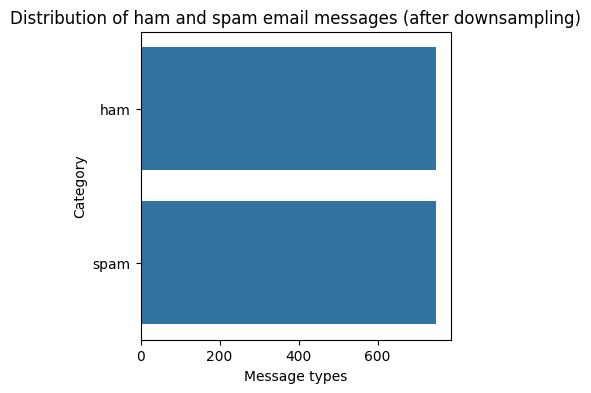

In [39]:
# Variante

import seaborn as sns
import matplotlib.pyplot as plt

# Zusammenführen der ausgewählten ham- und spam-Nachrichten
balanced_data = pd.concat([ham_msg, spam_msg]).reset_index(drop=True)

# Plotting
plt.figure(figsize=(4, 4))
sns.countplot(balanced_data['Category'])
plt.title('Distribution of ham and spam email messages (after downsampling)')
plt.xlabel('Message types')
plt.show()



In [40]:
balanced_data.head()

,Category,Message
0,ham,If i not meeting ü all rite then i'll go home ...
1,ham,"I.ll always be there, even if its just in spir..."
2,ham,"Sorry that took so long, omw now"
3,ham,I thk 50 shd be ok he said plus minus 10.. Did...
4,ham,Dunno i juz askin cos i got a card got 20% off...


In [41]:
balanced_data['label']=balanced_data['Category'].map({'ham':0,'spam':1})

In [42]:
train_msg, test_msg, train_labels, test_labels =train_test_split(balanced_data['Message'],balanced_data['label'],test_size=0.2,random_state=434)

#Tokenisierung und Padding

In [43]:
vocab_size=500
oov_tok='<OOV>'
max_len=50

In [44]:
#Vorverarbeitung, um aus Text Token zu machen
token=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
token.fit_on_texts(train_msg)

In [45]:
word_index=token.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'your': 8,
 'u': 9,
 'for': 10,
 '2': 11,
 'and': 12,
 'is': 13,
 'now': 14,
 'free': 15,
 'or': 16,
 'in': 17,
 'on': 18,
 'have': 19,
 'ur': 20,
 'of': 21,
 'txt': 22,
 '4': 23,
 'me': 24,
 'are': 25,
 'with': 26,
 'from': 27,
 'text': 28,
 'this': 29,
 'my': 30,
 'get': 31,
 'stop': 32,
 'mobile': 33,
 'just': 34,
 'no': 35,
 'it': 36,
 'will': 37,
 'reply': 38,
 'only': 39,
 'be': 40,
 'that': 41,
 'claim': 42,
 'www': 43,
 'not': 44,
 'out': 45,
 'do': 46,
 'send': 47,
 'new': 48,
 'so': 49,
 'our': 50,
 'we': 51,
 'but': 52,
 'at': 53,
 'prize': 54,
 'can': 55,
 'cash': 56,
 'all': 57,
 'if': 58,
 "i'm": 59,
 'who': 60,
 '150p': 61,
 'uk': 62,
 'go': 63,
 '1': 64,
 'nokia': 65,
 'please': 66,
 'win': 67,
 't': 68,
 'tone': 69,
 'won': 70,
 'week': 71,
 'com': 72,
 'msg': 73,
 '50': 74,
 'was': 75,
 'day': 76,
 'up': 77,
 'phone': 78,
 'by': 79,
 'been': 80,
 'what': 81,
 'want': 82,
 'service': 83,
 'know

In [46]:
padding_type='post'
truncate_type='post'
Trainning_seq=token.texts_to_sequences(train_msg)
Trainning_pad=pad_sequences(Trainning_seq,maxlen=50,padding=padding_type,truncating=truncate_type)

In [47]:
Testing_seq=token.texts_to_sequences(test_msg)
Testing_pad=pad_sequences(Testing_seq,maxlen=50,padding=padding_type,truncating=truncate_type)

#Modelldefinition und Training

In [48]:
#model
model=tf.keras.models.Sequential([tf.keras.layers.Embedding(vocab_size,16,input_length=50),
                                  tf.keras.layers.GlobalAveragePooling1D(),
                                  tf.keras.layers.Dense(32,activation='relu'),
                                  tf.keras.layers.Dropout(0.3),
                                  tf.keras.layers.Dense(1,activation='sigmoid')])


In [50]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'],optimizer='adam')

In [51]:
epoch=30
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=model.fit(Trainning_pad, train_labels ,validation_data=(Testing_pad, test_labels),epochs=epoch,callbacks=[early_stop],verbose=2)

Epoch 1/30


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


38/38 - 1s - loss: 0.6852 - accuracy: 0.6092 - val_loss: 0.6737 - val_accuracy: 0.7324 - 935ms/epoch - 25ms/step
Epoch 2/30
38/38 - 0s - loss: 0.6607 - accuracy: 0.8159 - val_loss: 0.6370 - val_accuracy: 0.8194 - 104ms/epoch - 3ms/step
Epoch 3/30
38/38 - 0s - loss: 0.6139 - accuracy: 0.8444 - val_loss: 0.5720 - val_accuracy: 0.8495 - 103ms/epoch - 3ms/step
Epoch 4/30
38/38 - 0s - loss: 0.5413 - accuracy: 0.8695 - val_loss: 0.4855 - val_accuracy: 0.8763 - 98ms/epoch - 3ms/step
Epoch 5/30
38/38 - 0s - loss: 0.4523 - accuracy: 0.8929 - val_loss: 0.4004 - val_accuracy: 0.8896 - 106ms/epoch - 3ms/step
Epoch 6/30
38/38 - 0s - loss: 0.3738 - accuracy: 0.8996 - val_loss: 0.3327 - val_accuracy: 0.8963 - 146ms/epoch - 4ms/step
Epoch 7/30
38/38 - 0s - loss: 0.3148 - accuracy: 0.9063 - val_loss: 0.2780 - val_accuracy: 0.9130 - 140ms/epoch - 4ms/step
Epoch 8/30
38/38 - 0s - loss: 0.2665 - accuracy: 0.9138 - val_loss: 0.2346 - val_accuracy: 0.9264 - 113ms/epoch - 3ms/step
Epoch 9/30
38/38 - 0s - los

#Evaluierung und Visualisierung der Trainingshistorie

In [52]:
model.evaluate(Testing_pad, test_labels)

10/10 [==============================] - 0s 1ms/step - loss: 0.0763 - accuracy: 0.9732


[0.07628731429576874, 0.9732441306114197]

Text(0.5, 0, 'epoch')

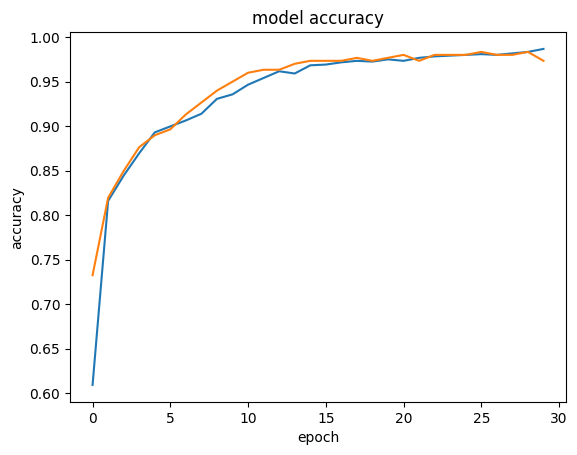

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

#Vorhersage

In [81]:
predict_msg = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
          "Thanks for your subscription to Video UK your mobile will be charged £5/month Please confirm by replying YES or NO",
          "Then we meet at three. I'm looking forward to it. Greetings to grandma"]

In [82]:
def predict_spam(predict_msg):
    new_seq = token.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =50,
                      padding = padding_type,
                      truncating='post')
    return (model.predict(padded))
predict_spam(predict_msg)

1/1 [==============================] - 0s 30ms/step


array([[1.4279004e-04],
       [9.9808860e-01],
       [1.2476720e-02]], dtype=float32)

#Klassifizierung der Vorhersagen

In [83]:
# Variante mit Klassifizierung


# Tokenisierung und Padding der neuen Nachrichten
predict_seq = token.texts_to_sequences(predict_msg)
predict_pad = pad_sequences(predict_seq, maxlen=50, padding=padding_type, truncating=truncate_type)

# Vorhersage mit dem trainierten Modell
predictions = model.predict(predict_pad)

# Ausgabe der Vorhersagen
for i, msg in enumerate(predict_msg):
    print(f"Message: {msg}")
    print(f"Predicted Label: {round(predictions[i][0])} (1 for 'spam', 0 for 'ham')")
    print("-----------")


1/1 [==============================] - 0s 27ms/step
Message: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Predicted Label: 0 (1 for 'spam', 0 for 'ham')
-----------
Message: Thanks for your subscription to Video UK your mobile will be charged £5/month Please confirm by replying YES or NO
Predicted Label: 1 (1 for 'spam', 0 for 'ham')
-----------
Message: Then we meet at three. I'm looking forward to it. Greetings to grandma
Predicted Label: 0 (1 for 'spam', 0 for 'ham')
-----------


In [60]:
loss, accuracy = model.evaluate(Testing_pad, test_labels)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

10/10 [==============================] - 0s 1ms/step - loss: 0.0671 - accuracy: 0.9699
Test Loss: 0.06707966327667236, Test Accuracy: 0.9698996543884277


#Zugabe: Spaß mit Auswertungen

In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Trainingsdaten vorhersagen
train_predictions = model.predict(Trainning_pad)
train_predictions = (train_predictions > 0.5).astype(int)

# Testdaten vorhersagen
test_predictions = model.predict(Testing_pad)
test_predictions = (test_predictions > 0.5).astype(int)

# Präzision, Rückruf und F1-Score für Trainingsdaten
train_precision = precision_score(train_labels, train_predictions)
train_recall = recall_score(train_labels, train_predictions)
train_f1 = f1_score(train_labels, train_predictions)

# Präzision, Rückruf und F1-Score für Testdaten
test_precision = precision_score(test_labels, test_predictions)
test_recall = recall_score(test_labels, test_predictions)
test_f1 = f1_score(test_labels, test_predictions)

# Ausgabe der Ergebnisse
print("Trainingsdaten:")
print(f"Präzision: {train_precision:.4f}")
print(f"Rückruf: {train_recall:.4f}")
print(f"F1-Score: {train_f1:.4f}")

print("\nTestdaten:")
print(f"Präzision: {test_precision:.4f}")
print(f"Rückruf: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")


10/10 [==============================] - 0s 1ms/step
Trainingsdaten:
Präzision: 1.0000
Rückruf: 0.9884
F1-Score: 0.9942

Testdaten:
Präzision: 0.9853
Rückruf: 0.9504
F1-Score: 0.9675


In [62]:
model.fit(Trainning_pad, train_labels, epochs=epoch, validation_data=(Testing_pad, test_labels), callbacks=[early_stop])

Epoch 1/30
38/38 [==============================] - 0s 5ms/step - loss: 0.0290 - accuracy: 0.9950 - val_loss: 0.0648 - val_accuracy: 0.9799
Epoch 2/30
38/38 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.9933 - val_loss: 0.0657 - val_accuracy: 0.9799
Epoch 3/30
38/38 [==============================] - 0s 2ms/step - loss: 0.0314 - accuracy: 0.9958 - val_loss: 0.0646 - val_accuracy: 0.9833
Epoch 4/30
38/38 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9958 - val_loss: 0.0643 - val_accuracy: 0.9833
Epoch 5/30
38/38 [==============================] - 0s 2ms/step - loss: 0.0282 - accuracy: 0.9933 - val_loss: 0.0654 - val_accuracy: 0.9732
Epoch 6/30
38/38 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 0.9941 - val_loss: 0.0641 - val_accuracy: 0.9799
Epoch 7/30
38/38 [==============================] - 0s 2ms/step - loss: 0.0297 - accuracy: 0.9941 - val_loss: 0.0650 - val_accuracy: 0.9732
Epoch 8/30
38/38 [==

In [63]:
loss, accuracy = model.evaluate(Testing_pad, test_labels)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

10/10 [==============================] - 0s 1ms/step - loss: 0.0641 - accuracy: 0.9799
Test Loss: 0.06407622992992401, Test Accuracy: 0.9799330830574036
